In [1]:
#ml packages
import pandas as pd #data manupulation(handling dataframes)
import numpy as np #numerical computations
import pickle #to save trained model file
import nltk #related to natural language processing - for analyzing human lang - (tokenization,stemming)
import re #regular expression - searching patterns in string
from nltk.stem import PorterStemmer #stemming algo (running-run)

#visualization
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt #plots,graphs
plt.style.use('ggplot') #clear style in plots

#preprocessing
from sklearn.preprocessing import LabelEncoder #feature encoding - (0,1,2)


In [2]:
#loading data
data = pd.read_csv("train.txt", header=None, sep=";", names=["Comment", "Emotion"], encoding="utf-8")

In [3]:
data["length"] = [len(x) for x in data["Comment"]]

In [4]:
data.head(5)

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20


In [5]:
data.shape

(16000, 3)

In [6]:
data.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [7]:
data.duplicated().sum()

1

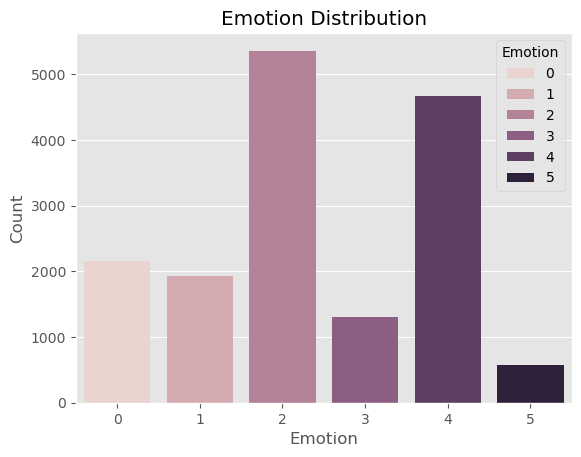

In [16]:
#visualization
sns.countplot(x=data['Emotion'], hue=data["Emotion"])
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

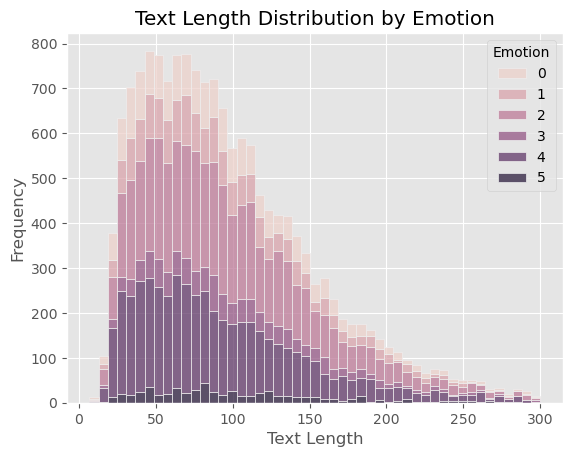

In [20]:
#visualization
sns.histplot(data=data,x='length',hue='Emotion',multiple='stack')
plt.title("Text Length Distribution by Emotion")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [21]:
#encoding emotion eah class assigned a int val
le = LabelEncoder()
data['Emotion'] = le.fit_transform(data['Emotion'])

In [12]:
data.head()

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


In [13]:
label_to_emotion = {
    0: "Anger",
    1: "Fear",
    2: "Joy",
    3: "Love",
    4: "Sadness",
    5: "Surprise"
}

In [22]:
from sklearn.model_selection import train_test_split #for splittting dataset(train,test)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #CV-freq of word Tfidf-imp of word(how rare it occurs)

from sklearn.naive_bayes import MultinomialNB #probability based
from sklearn.linear_model import LogisticRegression #linear classifier
from sklearn.ensemble import RandomForestClassifier #use multiple decision trees
from sklearn.svm import SVC #based on Support Vector Machines - hyperplane

from sklearn.metrics import accuracy_score, classification_report #accuracy,precision

In [23]:
from tqdm import tqdm #FOR showing progress bar
tqdm.pandas()

nltk.download('stopwords') #stopwords - insignificant words (is,and,the)
stopwords = set(nltk.corpus.stopwords.words('english')) #storing all the english stopwords in a set

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df = data.copy()
df.head()

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


In [25]:
#cleaning data
def clean_data(text):
    stemmer = PorterStemmer() #running->run
    text = re.sub("[^a-zA-Z]", " ",text) #remove all characters from the text except alphabets. , Replaces non-alphabetical characters with a space.
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords] #Applies stemming and stopword removal to the list of words
    return " ".join(text) #Joins the processed list of words back into a single string, separated by spaces.

df['cleaned_comment'] = df['Comment'].progress_apply(clean_data)

100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:11<00:00, 1443.71it/s]


In [26]:
df.head()

,Comment,Emotion,length,cleaned_comment
0,i didnt feel humiliated,4,23,didnt feel humili
1,i can go from feeling so hopeless to so damned...,4,108,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,0,48,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,3,92,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,0,20,feel grouchi


In [28]:
#splitting data
X_train,X_test,y_train,y_test = train_test_split(df['cleaned_comment'], df['Emotion'], test_size=0.2, random_state=42)

In [29]:
#applying tfidf-vectorizer
tfidfvectorizer = TfidfVectorizer()
X_train_tfidf = tfidfvectorizer.fit_transform(X_train)
X_test_tfidf = tfidfvectorizer.transform(X_test)

In [30]:
X_train_tfidf.shape

(12800, 9257)

In [31]:
#Naive Bayes
nb_classifier = MultinomialNB()

#Training
nb_classifier.fit(X_train_tfidf, y_train)

#Make predictions
y_pred_nb = nb_classifier.predict(X_test_tfidf)

#accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("========Multinomial Naive Bayes========")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report")
print(classification_report(y_test, y_pred_nb))

========Multinomial Naive Bayes========
Accuracy: 0.655
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.31      0.46       427
           1       0.91      0.24      0.38       397
           2       0.58      0.98      0.73      1021
           3       1.00      0.03      0.06       296
           4       0.70      0.91      0.79       946
           5       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.85      0.41      0.41      3200
weighted avg       0.76      0.66      0.58      3200



In [32]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000)

#Training
lr.fit(X_train_tfidf, y_train)

#Make predictions
y_pred_lr = lr.predict(X_test_tfidf)

#accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("========Logistic Regression========")
print(f"Accuracy: {accuracy_lr}")
print("Classification Report")
print(classification_report(y_test, y_pred_lr))

========Logistic Regression========
Accuracy: 0.829375
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       427
           1       0.84      0.73      0.78       397
           2       0.78      0.94      0.85      1021
           3       0.80      0.49      0.61       296
           4       0.88      0.92      0.90       946
           5       0.77      0.45      0.57       113

    accuracy                           0.83      3200
   macro avg       0.82      0.72      0.76      3200
weighted avg       0.83      0.83      0.82      3200



In [34]:
#RandomForest
rf = RandomForestClassifier()

#Training
rf.fit(X_train_tfidf, y_train)

#Make predictions
y_pred_rf = rf.predict(X_test_tfidf)

#accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("========Random Forest========")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report")
print(classification_report(y_test, y_pred_rf))


========Random Forest========
Accuracy: 0.8490625
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       427
           1       0.82      0.82      0.82       397
           2       0.84      0.91      0.87      1021
           3       0.82      0.62      0.71       296
           4       0.92      0.88      0.90       946
           5       0.73      0.73      0.73       113

    accuracy                           0.85      3200
   macro avg       0.82      0.80      0.81      3200
weighted avg       0.85      0.85      0.85      3200



In [35]:
#SVM
svc = SVC()

# Train the classifier
svc.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test_tfidf)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("========Support Vector Machine========")
print(f"Accuracy: {accuracy_svc}")
print("Classification Report")
print(classification_report(y_test, y_pred_svc))

========Support Vector Machine========
Accuracy: 0.8190625
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       427
           1       0.84      0.71      0.77       397
           2       0.76      0.93      0.84      1021
           3       0.81      0.45      0.58       296
           4       0.88      0.91      0.89       946
           5       0.79      0.47      0.59       113

    accuracy                           0.82      3200
   macro avg       0.82      0.71      0.75      3200
weighted avg       0.82      0.82      0.81      3200



Random Forest showed highest Accuracy

In [36]:
def predict_emotion(input_text):
    cleaned_text = clean_data(input_text)
    input_vectorizer = tfidfvectorizer.transform([cleaned_text])
    predicted_label = rf.predict(input_vectorizer)[0]
    predicted_emotion = label_to_emotion[predicted_label]  # Map label to emotion
    confidence_label = np.max(rf.predict_proba(input_vectorizer))  # Confidence score
    
    return predicted_emotion, predicted_label,confidence_label

In [37]:
#Testing with our data
predict_emotion("i feel a little mellow today")

('Joy', 2, 0.73)

Deep Learning - LSTM (Long Short Term Memory)

In [41]:
#deeplearning packages
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Dropout
from keras.callbacks import EarlyStopping #stops tranning when accuracy stops increasing - prevent overfitting
from keras.preprocessing.text import one_hot #convert words in sen to integers
from keras_preprocessing.sequence import pad_sequences #converts abv sen to fixed len by adding 0 , or truncating
from keras.utils import to_categorical #perform one_hot encoding for each int idx in each sen

In [43]:
def text_cleaning(df,column,vocab_size,max_len):
    stemmer = PorterStemmer()
    corpus = []
    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ",text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding="pre")
    return pad

In [44]:
X_train = text_cleaning(data, "Comment" , vocab_size=11000, max_len=300)
y_train = to_categorical(data["Emotion"])

In [50]:
model = Sequential() #one inp - one op
model.add(Embedding(input_dim=11000, output_dim=150, input_length=300))
model.add(Dropout(0.2)) #avoid overfitting
model.add(LSTM(128)) # effective at learning and retaining pattern
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1, callbacks=[callback])

Epoch 1/5
250/250 [==============================] - 64s 246ms/step - loss: 1.5254 - accuracy: 0.3934
Epoch 2/5
250/250 [==============================] - 77s 308ms/step - loss: 0.8229 - accuracy: 0.7259
Epoch 3/5
250/250 [==============================] - 75s 302ms/step - loss: 0.3588 - accuracy: 0.8864
Epoch 4/5
250/250 [==============================] - 97s 390ms/step - loss: 0.2276 - accuracy: 0.9283
Epoch 5/5
250/250 [==============================] - 75s 300ms/step - loss: 0.1697 - accuracy: 0.9451


In [51]:
def dl_predictive_system(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ", sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding="pre")
    return pad

In [52]:
sentence = dl_predictive_system("He hates me")
result = le.inverse_transform(np.argmax(model.predict(sentence),axis=1))[0]
emotion = label_to_emotion[result]
prob = np.max(model.predict(sentence))
print(f"{emotion} with probability of {prob}")

1/1 [==============================] - 0s 38ms/step
Anger with probability of 0.9520832300186157
